## **Convolution Neural Network(CNN):**
* If input data is unstructured(images) then we use CNN.
* ANN input has and independent features where as CNN doesnot have dependen tin input.
* Generally Human brain has Cerebral cortex inside it Visual cortex which is subdivided into V1 to V6 by which it understand the given input.
* CNN input is unstructered and in pixel(smallest unit in display) format, we have to flatten this and give to ANN.
* 56x56(horizontalxvertical) image size then flatten and give to ANN if it is 3D we add 56x56x3.
* Different types of Images:
 * Binary Images:
   * Image is in form of matrix if 1-dark 0-white.
   * if there is information in particular box it will be represented by 1.
 * Gray Scale Immages:
   * Here image represented as matrix but values ranges from 0-255 (0-black, 255-white)
   * it is monochromatic shades of grade
 * Coloured Images:
   * Stored in 3D array with Red, Green, Blue in each layer(channel).


* Layers in CNN:
  1. Convolution Layer:
    * Linear Operation that will basically involves multiplicaation(dot product) of input with 2D array of Weights(Filter) o/p : feature map
    * Image(nxn) filter(fxf) then Dimensions of Feature((n-f+1)/s)x((n-f+1)/s) here s-stride
    * Filter: Helps to get features from images. Generally filter sizes are 3x3,5x5,7x7
    * Values of filter will get updated by back propagation
    * Here the size of feature map will decrease but it should not so we use padding, values inside padding can be 0 or the nearest value.
    * feature map -> (n+2p-f+1)/s, in practical p=same->add layer
    p=valid-> no
  2. Pooling Layer:
    * MAX(Extracting most prominent feature) - here we decide filter size and consider max value from feature map.
    * MIN
    * Mean
  3. Flatten Layer:
    * Here the matrix converted to 1D and given to fullty connected.
  4. Fully Connected Layer -> ANN


### Steps for CNN :
1. ### **Data collection**

  100 images for each class

  dataset training set 70

  bear 70
  dog 70
  cat 70
  horse 70
  elephant 70

  testing set 30

  bear 30
  dog30
  cat30
  horse30
  elephant30

2. ### **Image PreProcessing**
  * import image data generator
  * configure the image data generator class
  * apply image data generator functionality to my data

3. ### **Model Building**
  *  import all the necessary model building libraries
  *  initiliaze the model
  * add convolution layer(no.of filters, size of filter, input shape, activation function)
  * max pooling layer(pool_size)
  * add flatten layer (input of ann)
  * add hidden layer(no.of neurons, activation function=relu)
  * add output layer(no.of output clasees, activation=sotmax
  * compile the model(loss, optimizer, metrics)
  *  fit the model (x_train,steps per epoch, epochs, validation_data)

4. ### **Saving Model**
5. ### **Random Prediction**

### **Data Collection**

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 92% 57.0M/62.3M [00:00<00:00, 94.0MB/s]
100% 62.3M/62.3M [00:00<00:00, 99.3MB/s]


In [ ]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

In [ ]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### **Image Pre Processing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

ImageDataGenerator->Data Augmentation : Creating modified version of same data.
1. Rotation
2. Re-Scaling
3. Shifting
4. Blurring
5. Noising

In [ ]:
#configure image data generator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#apply image data generator functionality to train and test images
x_train = train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


### **Model Building**

In [ ]:
#initialising model
model = Sequential()

In [ ]:
#add convolution layer(no.of.filters,size of filters,input shape(image shape,dimenstion),activation="relu")
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#add flatten layer->input of ann
model.add(Flatten())

In [ ]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [ ]:
#compile model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
#fit model
model.fit(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

Epoch 1/25
39/39 [==============================] - 11s 291ms/step - loss: 1.1650 - accuracy: 0.5008 - val_loss: 0.9441 - val_accuracy: 0.5813
Epoch 2/25
39/39 [==============================] - 13s 340ms/step - loss: 0.9036 - accuracy: 0.6511 - val_loss: 0.7252 - val_accuracy: 0.7375
Epoch 3/25
39/39 [==============================] - 10s 263ms/step - loss: 0.7566 - accuracy: 0.7036 - val_loss: 0.5764 - val_accuracy: 0.7906
Epoch 4/25
39/39 [==============================] - 11s 278ms/step - loss: 0.6359 - accuracy: 0.7585 - val_loss: 0.4526 - val_accuracy: 0.8344
Epoch 5/25
39/39 [==============================] - 8s 217ms/step - loss: 0.5870 - accuracy: 0.7803 - val_loss: 0.8425 - val_accuracy: 0.6844
Epoch 6/25
39/39 [==============================] - 10s 268ms/step - loss: 0.5490 - accuracy: 0.7932 - val_loss: 0.3438 - val_accuracy: 0.8781
Epoch 7/25
39/39 [==============================] - 11s 286ms/step - loss: 0.4754 - accuracy: 0.8158 - val_loss: 0.4954 - val_accuracy: 0.8250


steps per epoch = no of samples in your training/batch size
1238/32=38.6==39

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

For Convolution Layers :
no.of.filters x (input_channels x window_size+1) = no.of.paramters

In [ ]:
32*(3*(3*3)+1)

896

For Dense Layer : output_size x (input_size + 1) = no.of.parameters

In [ ]:
128*(30752+1)

3936384

In [ ]:
4*(128+1)

516

### **Save our Model**

In [ ]:
model.save("animal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Test the Model**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.load_model(r"/content/animal.h5")

In [ ]:
img = image.load_img(r'/content/test_ig.jpeg',target_size=(64,64))

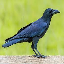

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[194., 211., 115.],
        [194., 211., 117.],
        [193., 210., 114.],
        ...,
        [181., 203.,  95.],
        [183., 203.,  88.],
        [183., 203.,  88.]],

       [[196., 213., 119.],
        [196., 212., 123.],
        [196., 213., 117.],
        ...,
        [183., 205.,  97.],
        [185., 205.,  92.],
        [186., 206.,  93.]],

       [[198., 215., 123.],
        [198., 214., 126.],
        [198., 214., 125.],
        ...,
        [184., 206.,  98.],
        [186., 206.,  95.],
        [188., 208.,  97.]],

       ...,

       [[189., 182., 176.],
        [215., 208., 202.],
        [232., 225., 219.],
        ...,
        [220., 211., 196.],
        [212., 203., 188.],
        [230., 221., 204.]],

       [[220., 215., 211.],
        [233., 228., 224.],
        [236., 231., 227.],
        ...,
        [220., 211., 196.],
        [249., 240., 225.],
        [180., 170., 158.]],

       [[216., 215., 213.],
        [216., 215., 213.],
        [215., 2

Here it is 3D array always we have to give 4D as input to CNN as batch_size is also a channel.

In [ ]:
x = np.expand_dims(x,axis=0)

axis=0 along row

In [ ]:
x.ndim

4

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 25ms/step


In [ ]:
pred

array([[0., 1., 0., 0.]], dtype=float32)

In [ ]:
val = np.argmax(pred,axis=1)

In [ ]:
out = {i for i in x_train.class_indices if x_train.class_indices[i]==val}

In [ ]:
print(out)

{'crows'}
